In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 200

X = np.random.rand(N,1)
Y = np.sin(2*np.pi*X) + np.random.uniform(-0.2,0.2, size=(N,1))
Z = np.sin(2*np.pi*X)

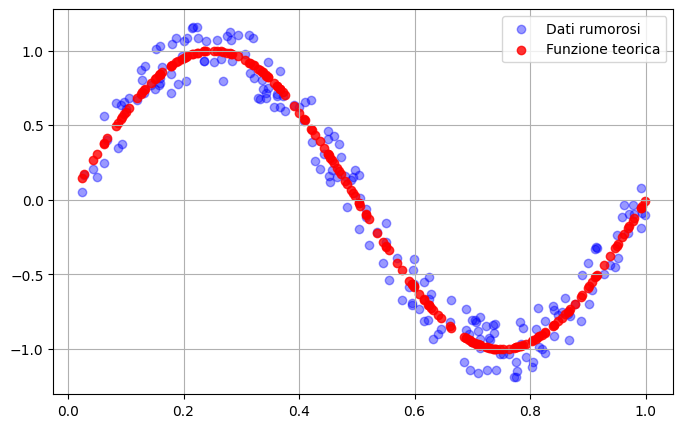

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', alpha=0.4, label='Dati rumorosi')
plt.scatter(X, Z, color='red' , alpha=0.8,label='Funzione teorica')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def pol(n, X=None):
    if X is None:
        X = np.linspace(0, 1, 100)  # default: 100 punti fra 0 e 1
    
    # Coefficienti casuali tra -0.5 e 0.5
    coef = np.random.uniform(-0.5, 0.5, size=n+1)
    p = np.polynomial.Polynomial(coef)
    Z = p(X)
    
    return Z, coef 


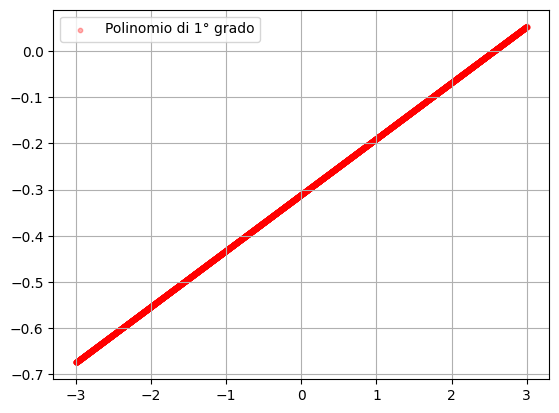

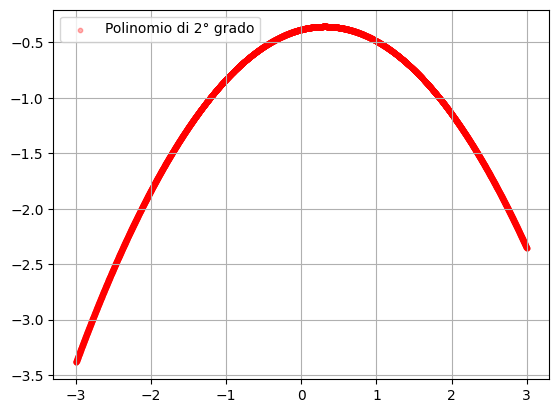

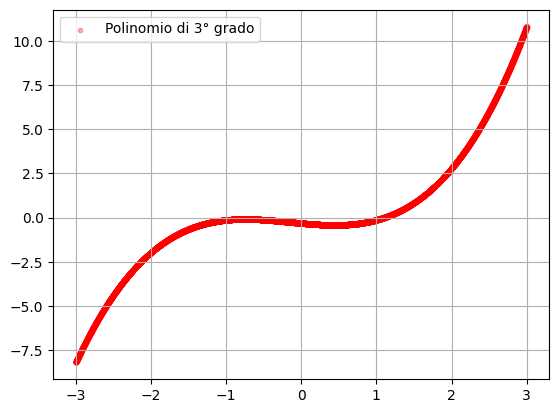

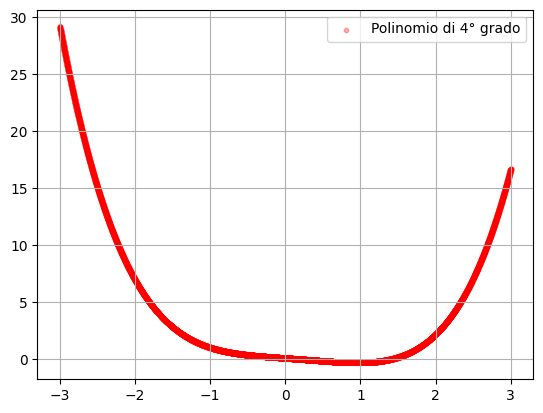

In [84]:
n = np.linspace(1,4,4)
for i in n:
    i = int(i) 
    X = np.linspace(-3,3, 10000)
    Z, _ = pol(i,X)

    plt.scatter(X, Z, s=10, color='red', alpha=0.3, label=f'Polinomio di {i}° grado')
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
def J(omega, Y, X, N):
    p =np.polynomial.Polynomial(omega)
    elements = (Y - p(X))**2
    return np.sum(elements)/(2*N)


def grad_J(omega, Y, X, N):
    M = len(omega)
    grad = np.zeros(M)
    error = (Y - np.polynomial.Polynomial(omega)(X))
    for j in range(M):
        # derivata rispetto a omega_j
            grad[j] = np.sum(error * X**j)
            grad[j] = -grad[j] / N
    
    return grad


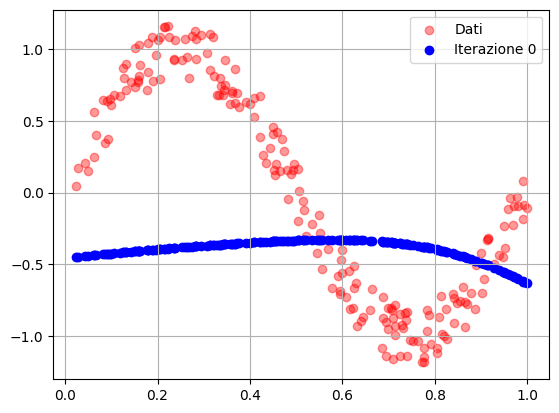

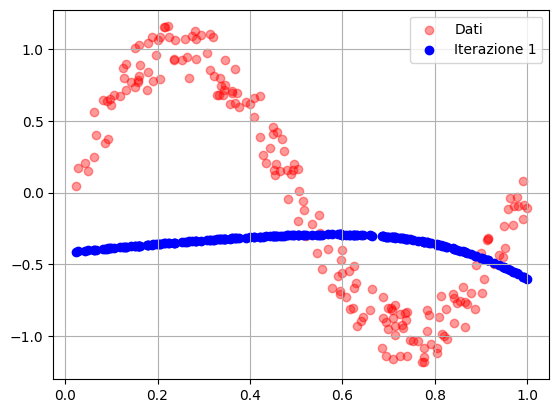

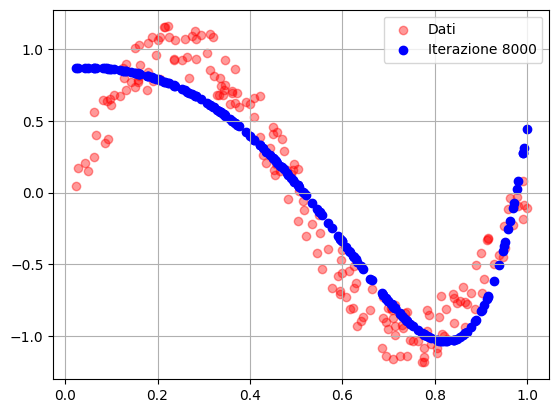

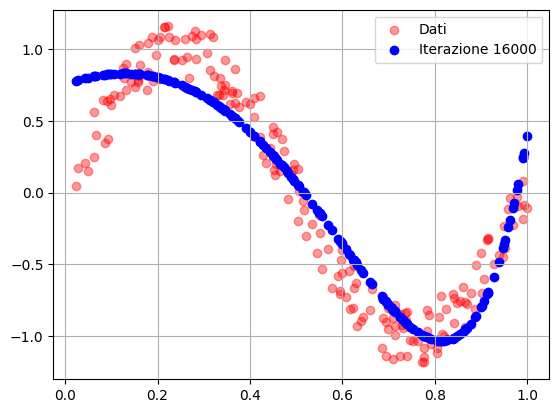

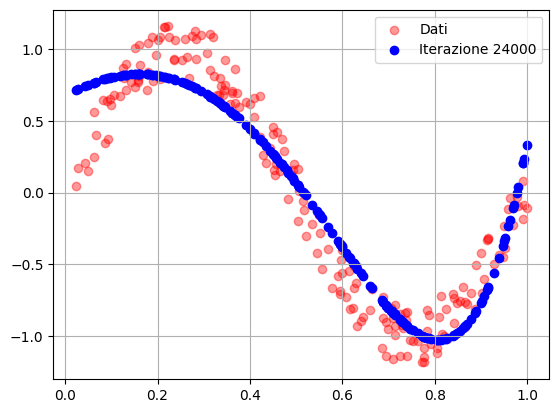

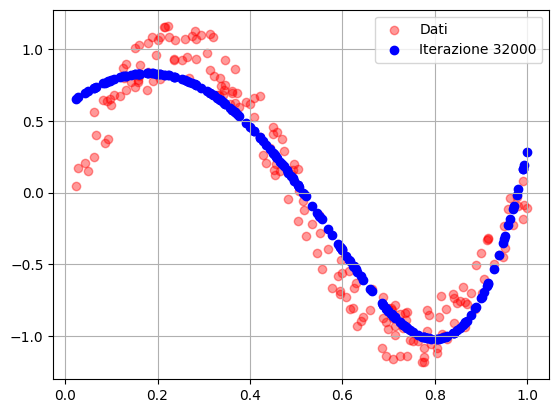

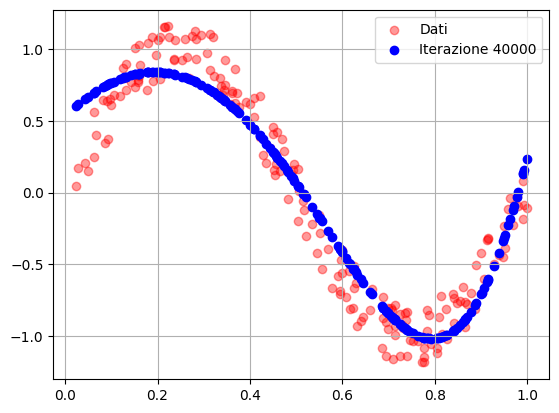

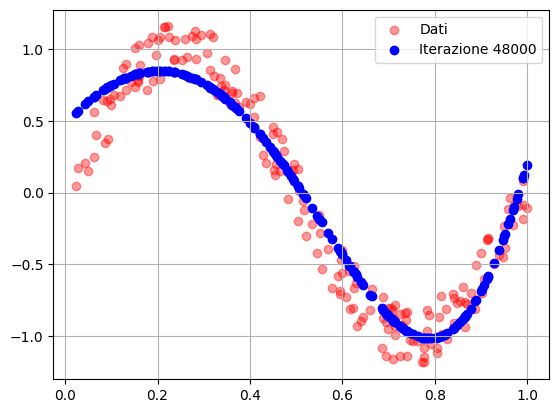

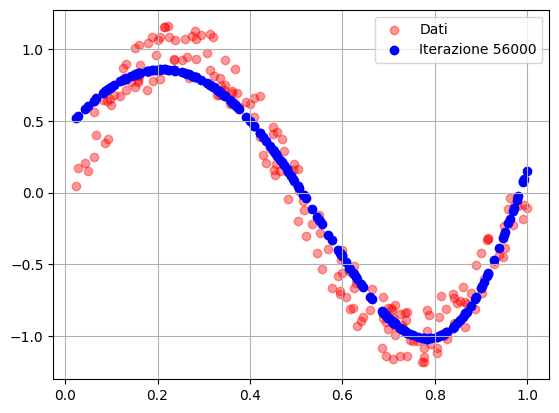

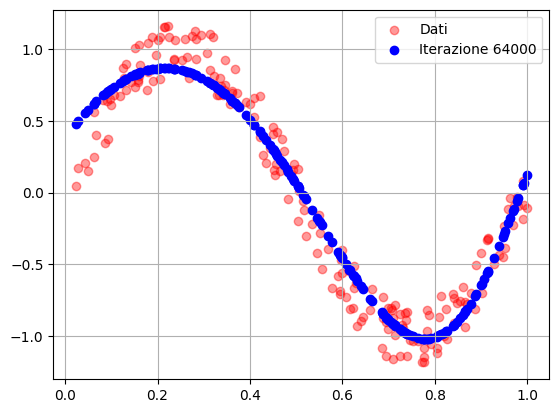

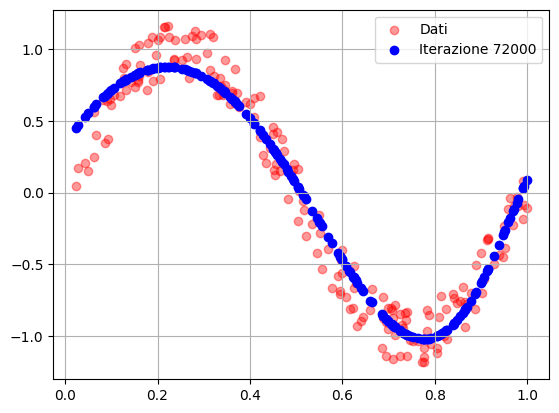

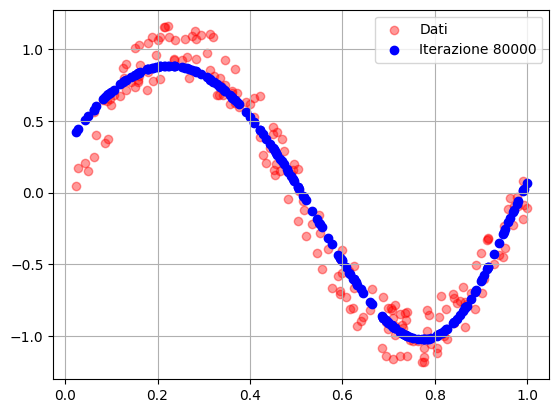

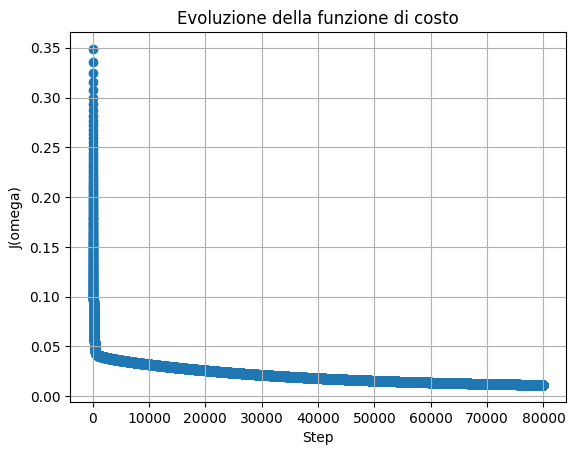

[ 0.31086221  4.95720073 -9.66765307 -4.98847168  1.27898504  4.13532207
  4.94784319  3.29652653  1.25767603 -1.21948265 -4.24022963]


In [11]:
eta=0.1
steps=80000
n=10
p, omega = pol(n,X)
J_history = []

for i in range (steps+1):
    omega = omega - eta*grad_J(omega,Y,X,N)
    cost = J(omega, Y, X, N)
    J_history.append(cost)
    #Grafico Dati - Polinomio
    if i % 8000 == 0 or i%80000 == 1:
        plt.scatter(X, Y, color='red',alpha=0.4, label='Dati')
        plt.scatter(X, np.polynomial.Polynomial(omega)(X),color='blue', label=f'Iterazione {i}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Grafico della funzione di costo
plt.scatter(range(steps+1), J_history)
plt.xlabel('Step')
plt.ylabel('J(omega)')
plt.title('Evoluzione della funzione di costo')
plt.grid(True)
plt.show()

print(omega)


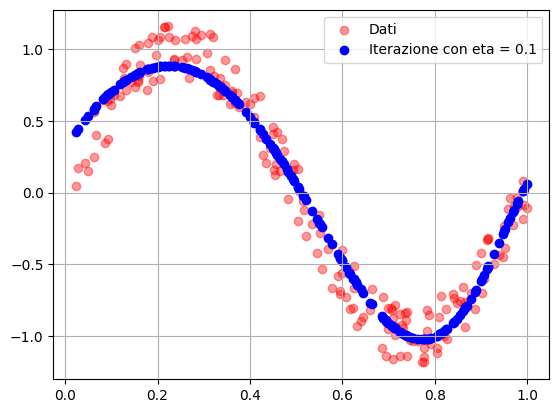

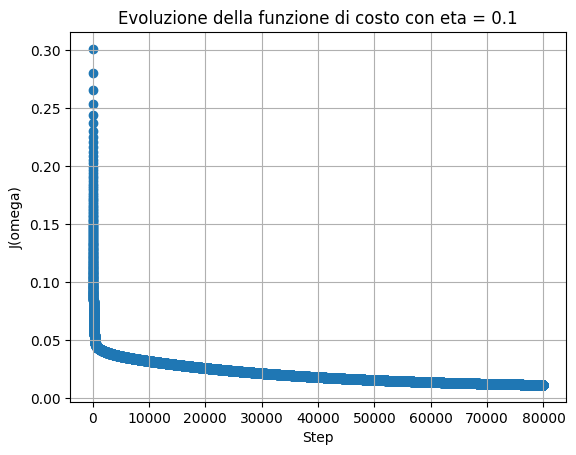

KeyboardInterrupt: 

In [9]:
etas=[0.1, 0.01, 0.001]
steps=80000
n=10

for eta in etas:
    p, omega = pol(n,X)
    J_history = []
    for i in range (steps+1):
        omega = omega - eta*grad_J(omega,Y,X,N)
        cost = J(omega, Y, X, N)
        J_history.append(cost)

    
    #Grafico Dati - Polinomio
    plt.scatter(X, Y, color='red',alpha=0.4, label='Dati')
    plt.scatter(X, np.polynomial.Polynomial(omega)(X),color='blue', label=f'Iterazione con eta = {eta}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Grafico della funzione di costo
    plt.scatter(range(steps+1), J_history)
    plt.xlabel('Step')
    plt.ylabel('J(omega)')
    plt.title(f'Evoluzione della funzione di costo con eta = {eta}')
    plt.grid(True)
    plt.show()


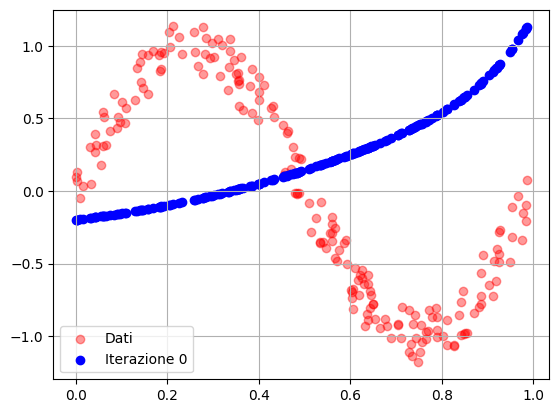

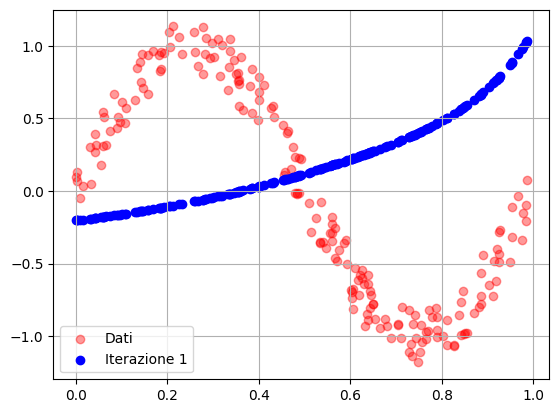

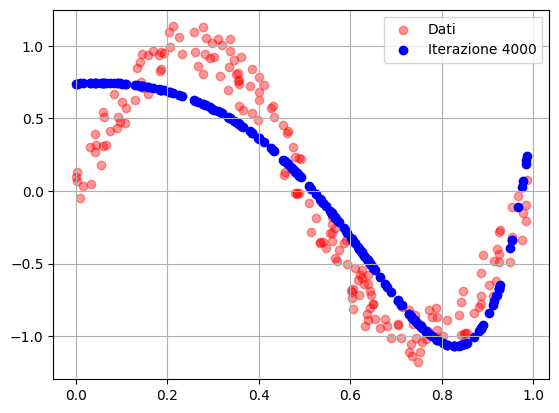

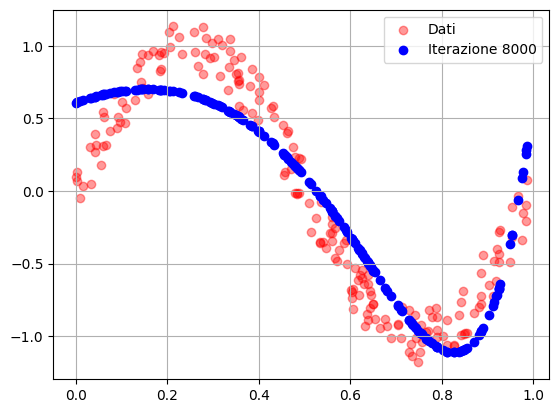

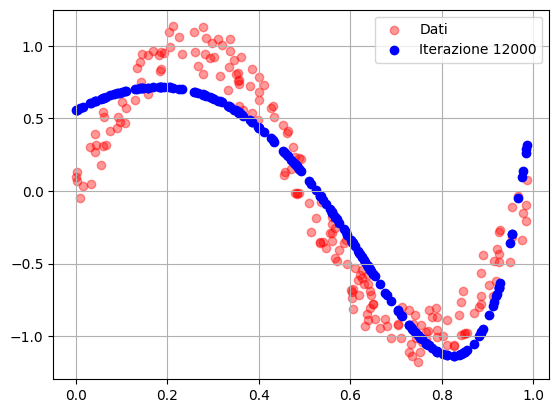

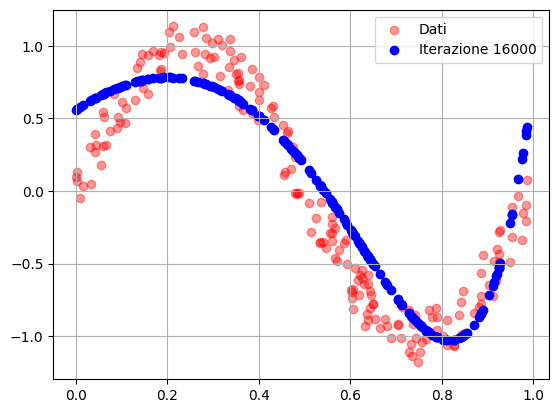

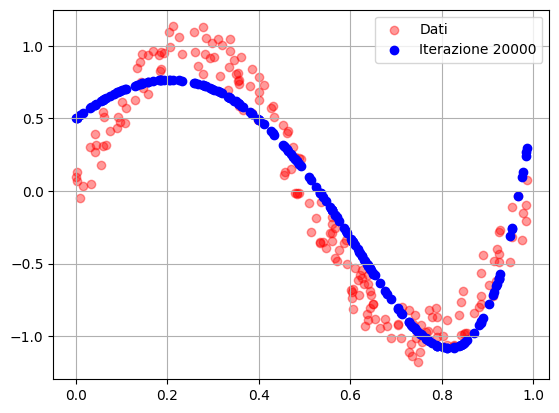

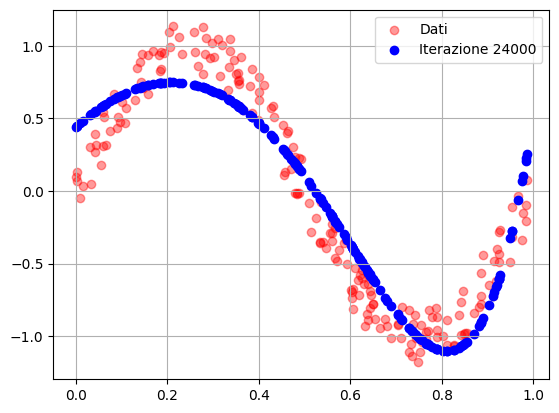

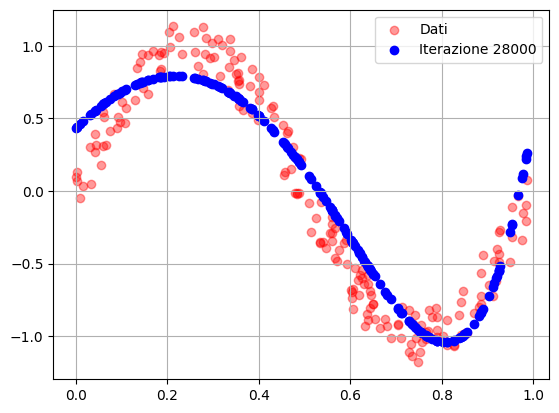

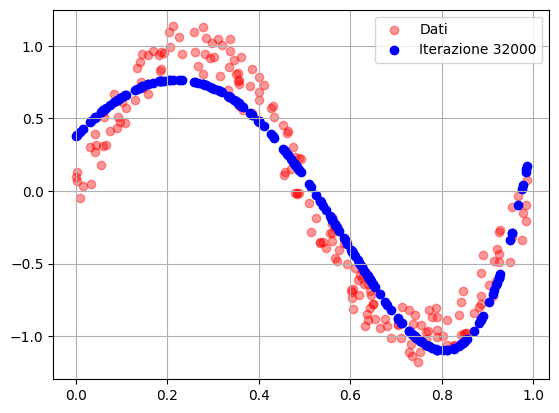

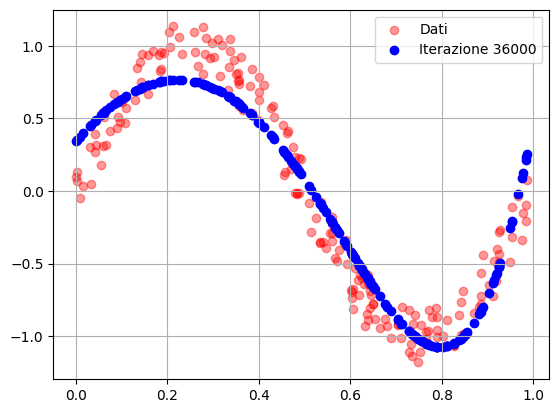

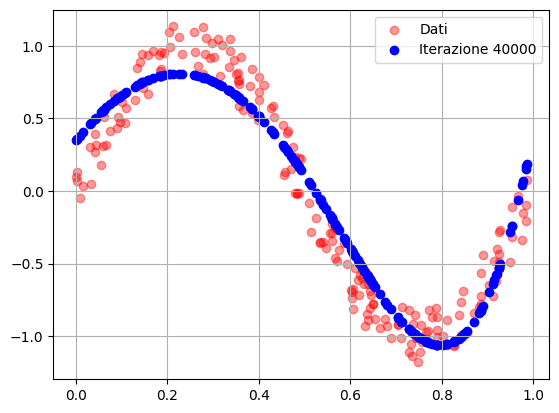

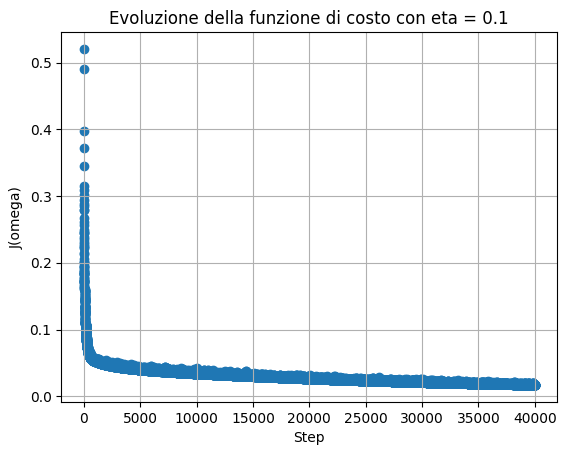

In [76]:
eta = 0.1
steps = 40000
batch_size = 5  # dimensione del mini-batch
J_history = []
n=10
p, omega = pol(n,X)

for i in range(steps+1):
    # Estrazione casuale di un sottoinsieme di indici
    indices = np.random.choice(N, batch_size, replace=False)
    X_batch = X[indices]
    Y_batch = Y[indices]
    
    omega = omega - eta * grad_J(omega, Y_batch, X_batch, batch_size)

    # Calcolo costo sull’intero dataset per monitoraggio
    cost = J(omega, Y, X, N)
    J_history.append(cost)
    if i % 4000 == 0 or i%40000 == 1:
        #Grafico Dati - Polinomio
        plt.scatter(X, Y, color='red',alpha=0.4, label='Dati')
        plt.scatter(X, np.polynomial.Polynomial(omega)(X),color='blue', label=f'Iterazione {i}')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Grafico della funzione di costo
plt.scatter(range(steps+1), J_history)
plt.xlabel('Step')
plt.ylabel('J(omega)')
plt.title(f'Evoluzione della funzione di costo con eta = {eta}')
plt.grid(True)
plt.show()